### РАЛЬФ ВИНС
### Математика управления капиталом
### Методы анализа риска для трейдеров и портфельных менеджеров
### Часть II

In [6]:
import pyttsx3
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt

#### Фундаментальное уравнение торговли

Мы можем получить гораздо больше, чем просто понимание того факта, что
уменьшение размера проигрышей улучшает конечный результат. Вернемся к
уравнению (1.19а):

(1.19a) Оценочное $TWR = (AHPR ^ 2 -SD ^ 2) ^ {1/2}) ^ N$

Подставим А вместо AHPR (среднее арифметическое HPR). Далее, так как (X ^ Y) ^ Z = Х ^ (Y * Z), мы можем еще больше упростить уравнение:

A = AHPR

**Оценочное $TWR = (A ^ 2 - SD ^ 2) ^ {N/2}$**

**Это последнее уравнение мы назовем фундаментальным уравнением торговли, так
как оно описывает, как различные факторы: А, SD и N — влияют на результат торговли.**

Очевидны несколько фактов. 

Во-первых, если А меньше или равно единице, тогда при любых значениях двух других переменных, SD и N, наш
результат не может быть больше единицы. 

Если А меньше единицы, то при N, стремящемся к бесконечности, наш результат приближается к нулю. Это означает,
что, если А меньше или равно 1 (математическое ожидание меньше или равно нулю, так как математическое ожидание равно А - 1), у нас нет шансов получить
прибыль. 

Фактически, если А меньше 1, то наше разорение — это просто вопрос времени (то есть достаточно большого N).

При условии, что А больше 1, сростом N увеличивается наша прибыль. 

Например, система показала среднее арифметическое 1,1 и стандартное отклонение 0,25.
Таким образом:

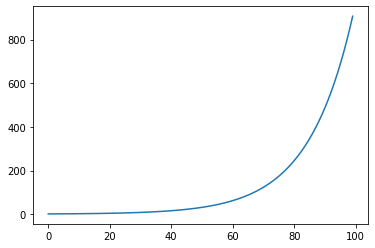

In [29]:
N = 100
A = 1.1
SD = 0.25
TWR = []
for n in range(N):
    y = (A**2 - SD**2)**(n/2)
    TWR.append([n, y])
twr_arr = np.array(TWR)
plt.plot(twr_arr[:,0], twr_arr[:,1])

Таким образом, каждая следующая сделка, каждое увеличение N на единицу
соответствует умножению нашего конечного счета на 1,071214264.

Отметьте, что это число является средним геометрическим. Каждый раз, когда осуществляется
сделка и когда N увеличивается на единицу, коэффициент умножается на среднее
геометрическое. В этом и состоит действительная польза диверсификации,
выраженная математически фундаментальным уравнением торговли.
Диверсификация позволяет вам как бы увеличить N (т.е. количество сделок) за
определенный период времени.

Есть еще одна важная деталь, которую необходимо
отметить при рассмотрении фундаментального уравнения торговли: хорошо, когда
вы уменьшаете стандартное отклонение больше, чем арифметическое среднее
HPR. **Поэтому следует быстро закрывать убыточные позиции (использовать
маленький stop-loss).**

Но уравнение также демонстрирует, что при выборе слишком
жесткого стопа вы можете больше потерять. Вас выбьет с рынка из-за слишком
большого количества сделок с маленьким проигрышем, которые позднее оказались
бы прибыльными, поскольку А уменьшается в большей степени, чем SD.

Вместе с тем, и уменьшение больших выигрышных сделок поможет вашей системе, если
это уменьшает SD больше, чем уменьшает А. Во многих случаях этого можно
достичь путем включения в вашу торговую программу опционов. Позиция по
опционам, которая направлена против позиции базового инструмента (покупка
опциона или продажа соответствующего опциона), может оказаться весьма
полезной.

Например, если у вас длинная позиция по какой-либо акции (или
товару), покупка пут-опциона (или продажа колл-опциона) может уменьшить ваше
SD по совокупной позиции в большей степени, чем уменьшить А.

Если вы
получаете прибыль по базовому инструменту, то будете в убытке по опциону. При
этом убыток опциону лишь незначительно уменьшит общую прибыль. Таким
образом, вы уменьшили как ваше SD, так и А. Если вы не получаете прибыль по
базовому инструменту, вам надо увеличить А и уменьшить SD. Надо стремиться
уменьшить SD в большей степени, чем уменьшить А.

Конечно, издержки на трансакции при такой стратегии довольно значительны, и
они всегда должны приниматься в расчет. Чтобы воспользоваться такой
стратегией, ваша программа не должна быть ориентирована на очень короткий
срок.

Все вышесказанное лишь подтверждает, что различные стратегии и
различные торговые правила должны рассматриваться сточки зрения
фундаментального уравнения торговли. Таким образом, мы можем оценить
влияние этих факторов на уровень возможных убытков и понять, что именно
необходимо сделать для улучшения системы.

Допустим, в долгосрочной торговой программе была использована выше-
упомянутая стратегия покупки пут-опциона совместно с длинной позицией по
базовому инструменту, в результате мы получили большее оценочное TWR.
Ситуация, когда одновременно открыты длинная позиция по базовому
инструменту и позиция по пут-опциону, эквивалентна просто длинной позиции по
колл-опциону. В том случае лучше просто купить колл-опцион, так как издержки
на трансакции будут существенно ниже1, чем при наличии длинной позиции по
базовому инструменту и длинной позиции по пут-опциону.

Здесь есть еще один плюс, который сразу может быть и не виден. Он состоит в том, что мы заранее знаем
проигрыш худшего случая. Учитывая, насколько чувствительно уравнение оптимального f к наибольшему
проигрышу, такая стратегия может приблизить нас к пику кривой f и показать, каким может быть наибольший
проигрыш. Во-вторых, проблема проигрыша в 3 стандартных отклонениях (или больше) с более высокой
вероятностью, чем подразумевает нормальное распределение, будет устранена. Именно гигантские
проигрыши более 3 стандартных отклонений разоряют большинство трейдеров. Опционные стратегии могут
полностью упразднить такие проигрыши.

Продемонстрируем это на примере рынка индексов акций в 1987 году. Допустим, мы покупаем базовый
инструмент — индекс ОЕХ. Система, которую мы будем использовать, является
простым 20-дневным прорывом канала. Каждый день мы рассчитываем самый
высокий максимум и самый низкий минимум последних 20 дней.

Затем, в течение
дня, если рынок повышается и касается верхней точки, мы покупаем.

Если цены идут вниз и касаются низшей точки, мы продаем. Если дневные открытия выше
или ниже точек входа в рынок, мы входим при открытии. Такая система
подразумевает постоянную торговлю на рынке: